Dataset Shape: (1118669, 34)


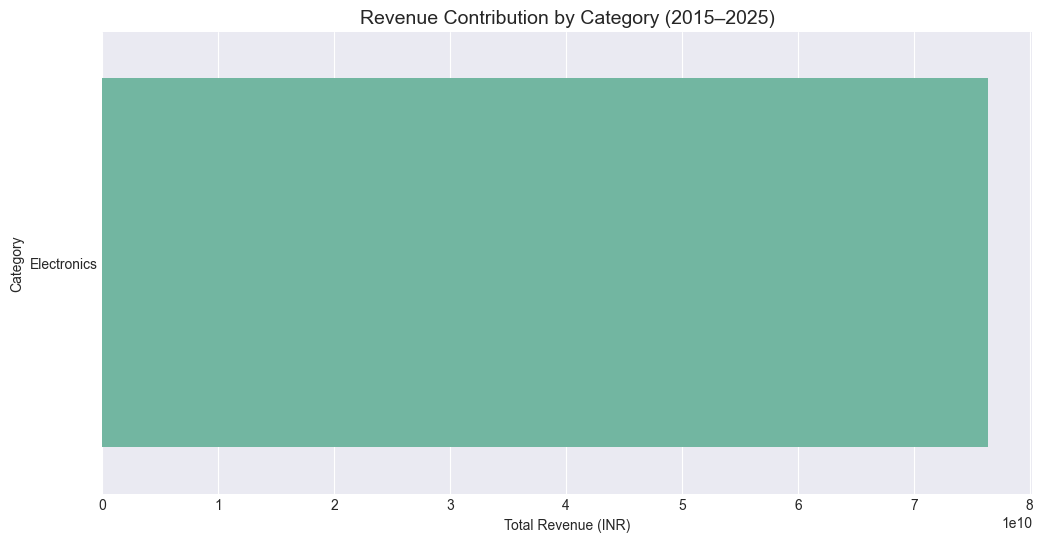

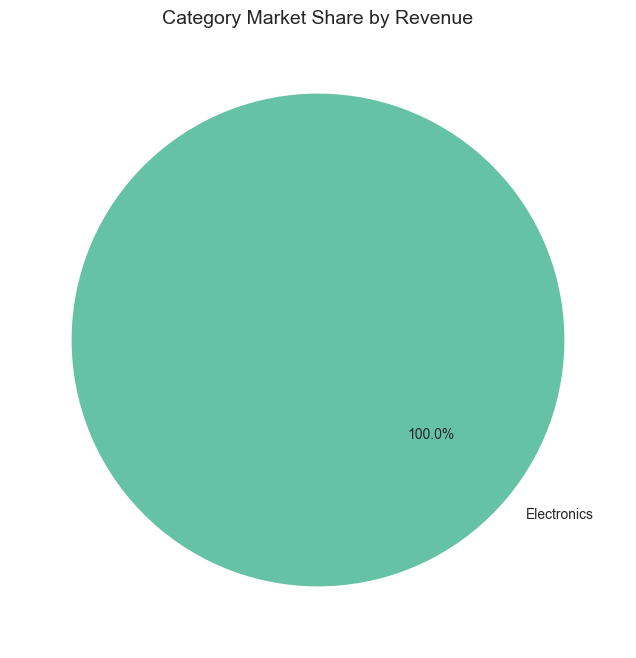

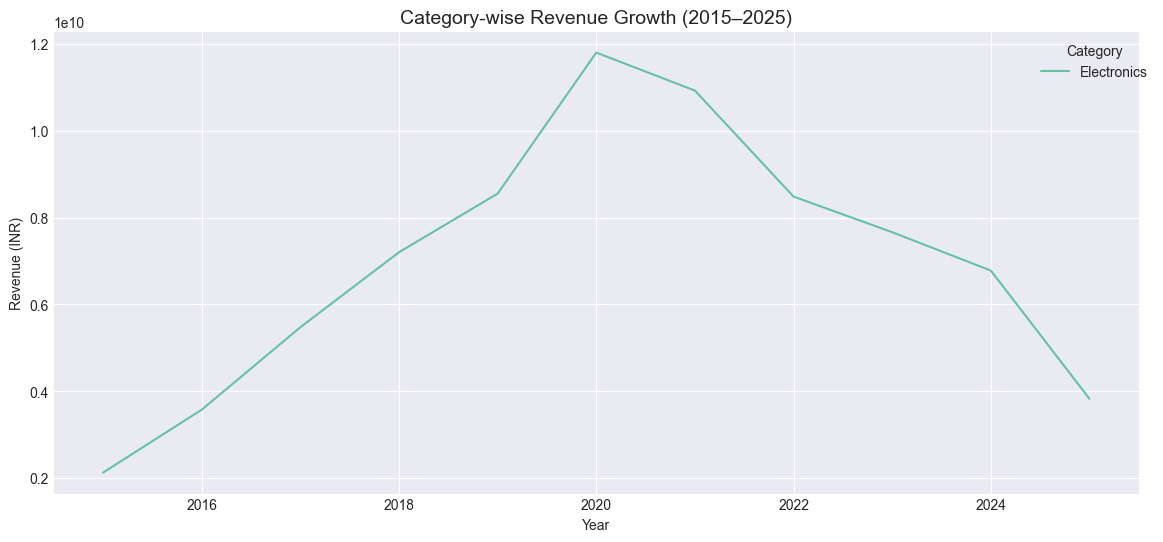

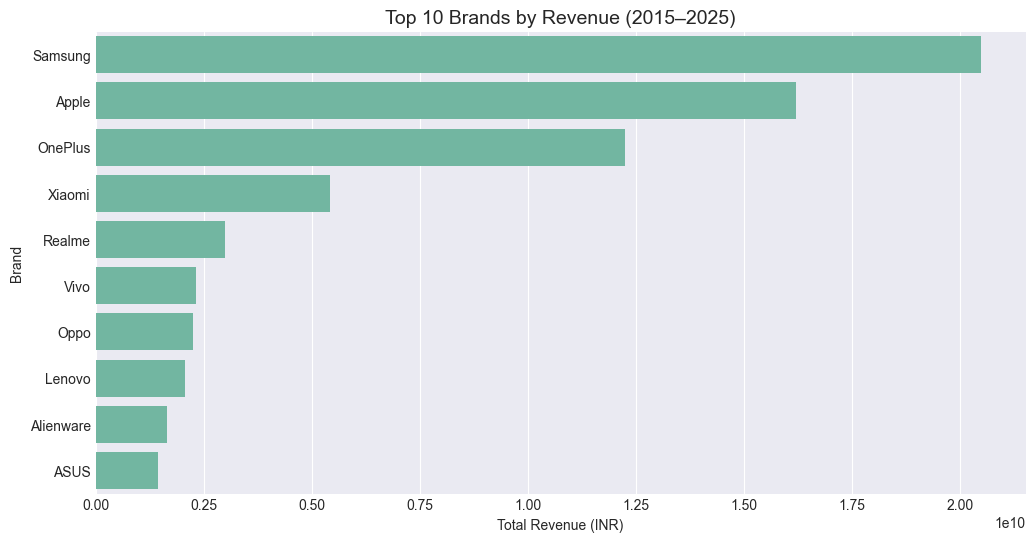

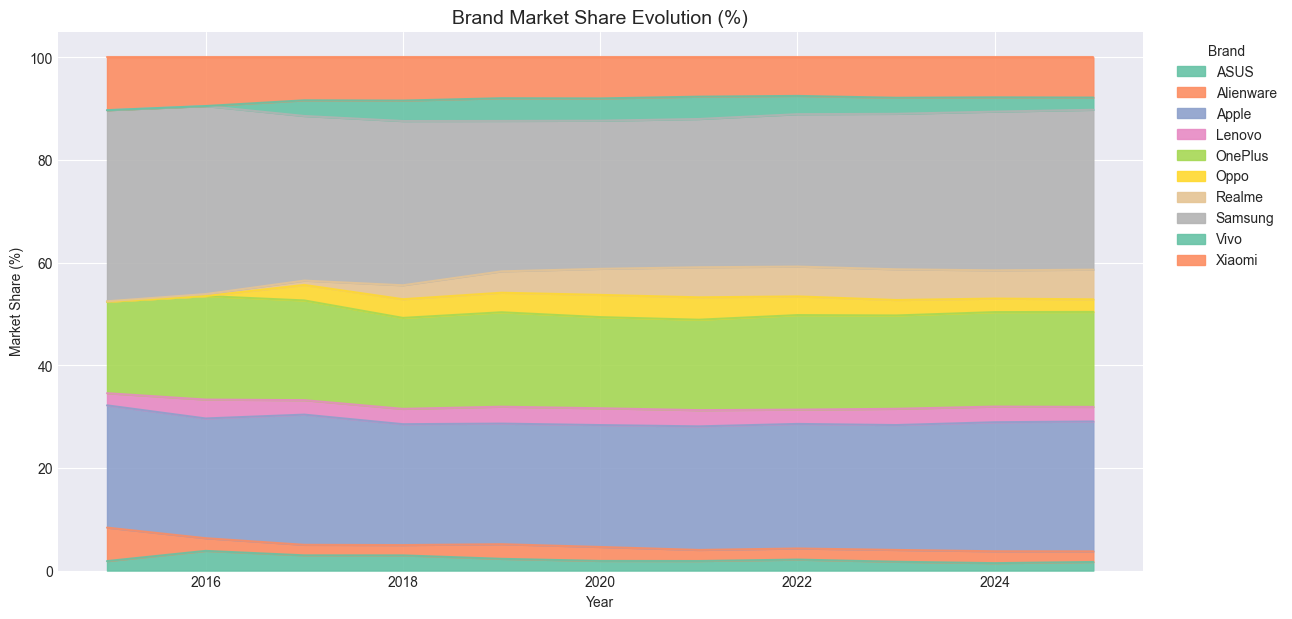

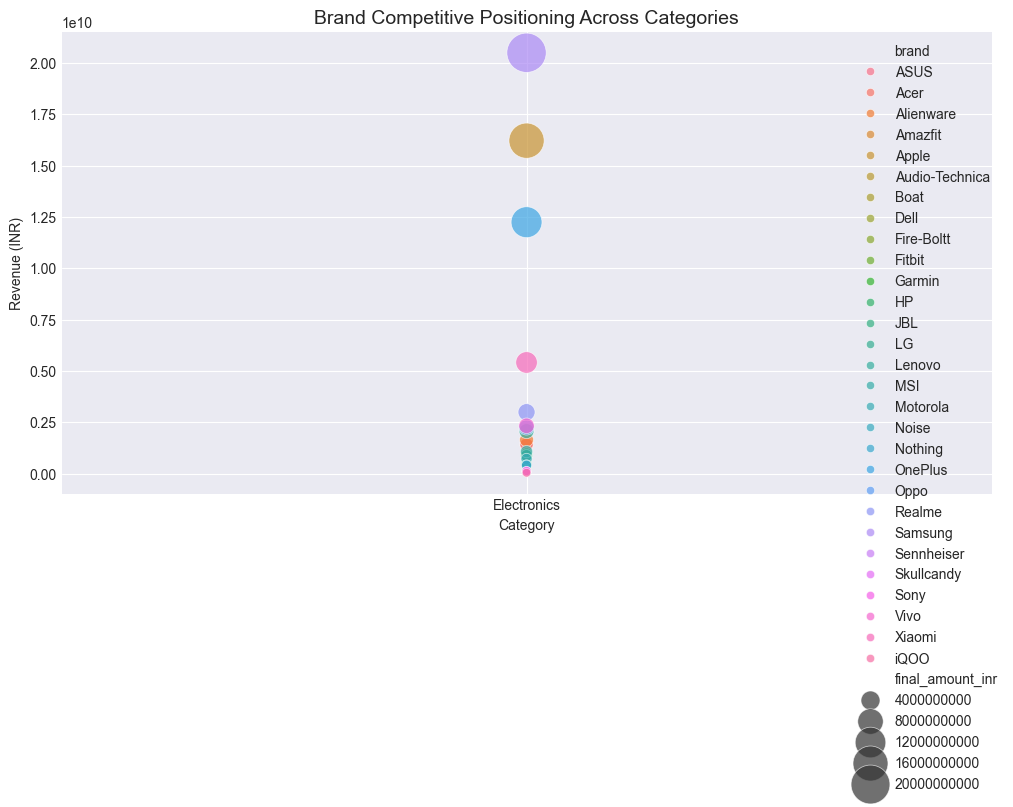

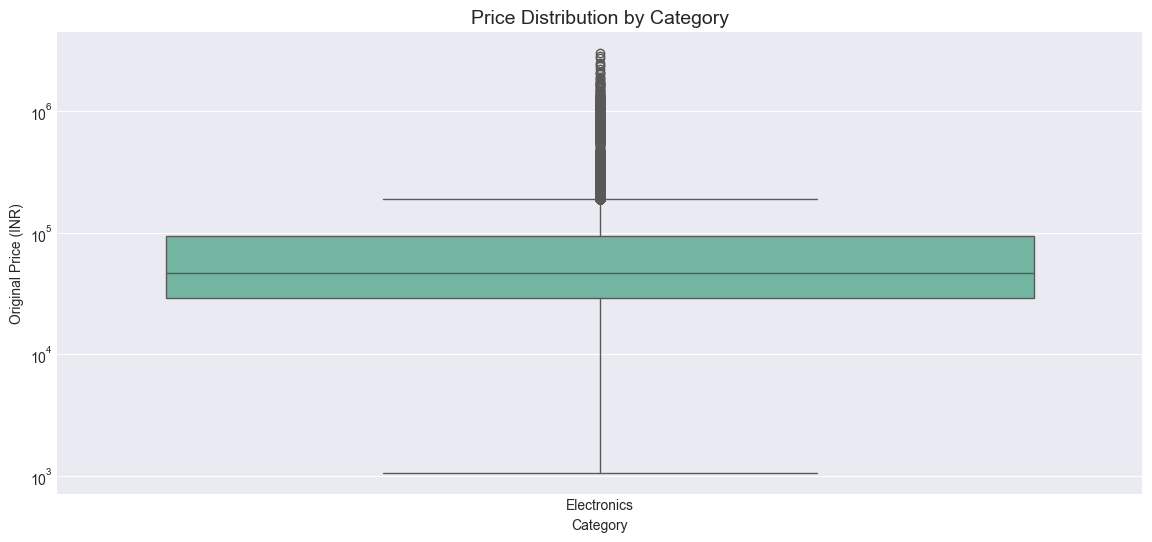

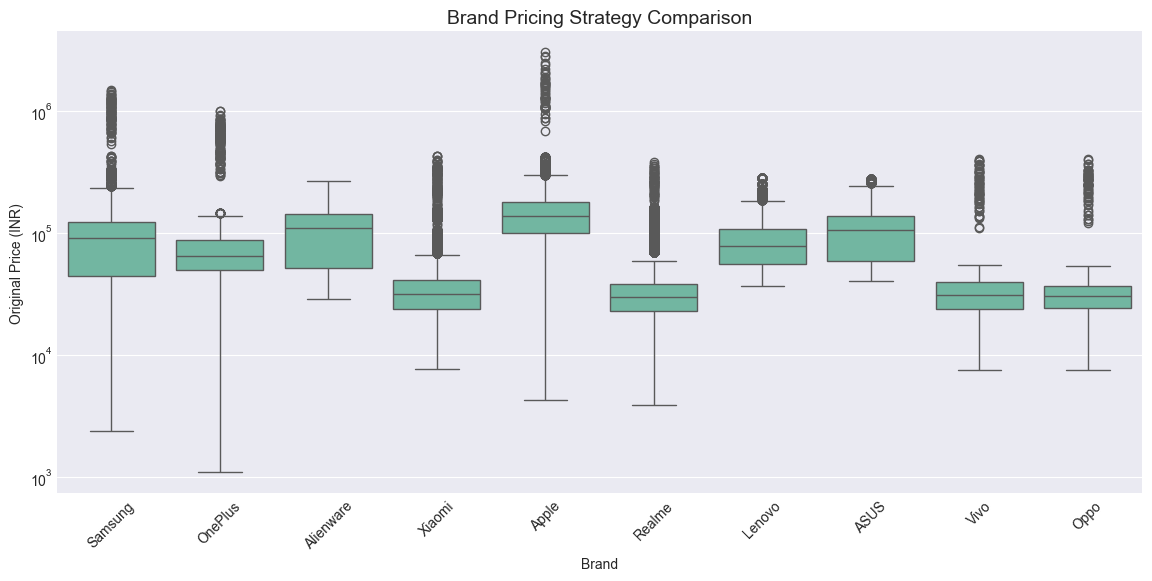

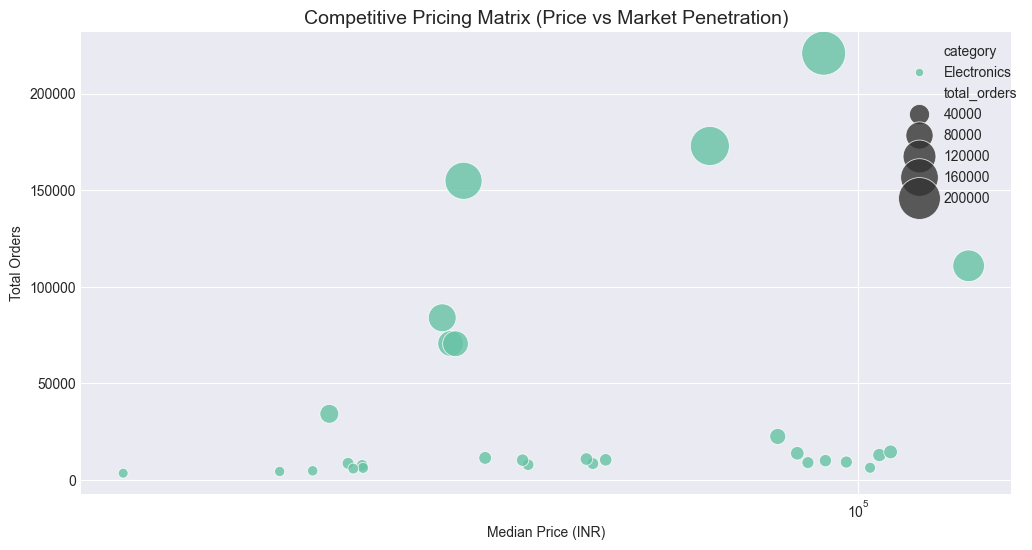

In [1]:
# =====================================================
# EDA 04: CATEGORY & BRAND PERFORMANCE ANALYSIS
# QUESTIONS:
# Q5  - Category-wise Performance Analysis
# Q13 - Brand Performance & Market Share Evolution
# Q19 - Competitive Pricing Analysis
# =====================================================

# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

# =========================
# LOAD MASTER DATASET
# =========================
DATA_PATH = "../master/amazon_india_master_2015_2025.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset Shape:", df.shape)

# =========================
# BASIC CLEANING
# =========================
df["order_year"] = df["order_year"].astype(int)
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["original_price_inr"] = pd.to_numeric(df["original_price_inr"], errors="coerce")

df = df.dropna(subset=["category", "brand", "final_amount_inr", "original_price_inr"])

# =====================================================
# QUESTION 5: CATEGORY-WISE PERFORMANCE
# =====================================================

# -------------------------
# Q5.1 Revenue Contribution by Category (Bar)
# -------------------------
category_revenue = (
    df.groupby("category")["final_amount_inr"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title("Revenue Contribution by Category (2015–2025)", fontsize=14)
plt.xlabel("Total Revenue (INR)")
plt.ylabel("Category")
plt.show()

# -------------------------
# Q5.2 Category Market Share (Pie)
# -------------------------
plt.figure(figsize=(8, 8))
plt.pie(
    category_revenue.values,
    labels=category_revenue.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Category Market Share by Revenue", fontsize=14)
plt.show()

# -------------------------
# Q5.3 Category Revenue Growth Over Time
# -------------------------
category_yearly = (
    df.groupby(["order_year", "category"])["final_amount_inr"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=category_yearly,
    x="order_year",
    y="final_amount_inr",
    hue="category"
)
plt.title("Category-wise Revenue Growth (2015–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend(title="Category", bbox_to_anchor=(1.02, 1))
plt.show()

# =====================================================
# QUESTION 13: BRAND PERFORMANCE & MARKET SHARE
# =====================================================

# -------------------------
# Q13.1 Top 10 Brands by Revenue
# -------------------------
top_brands = (
    df.groupby("brand")["final_amount_inr"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands by Revenue (2015–2025)", fontsize=14)
plt.xlabel("Total Revenue (INR)")
plt.ylabel("Brand")
plt.show()

# -------------------------
# Q13.2 Brand Market Share Evolution (Stacked Area)
# -------------------------
brand_year = (
    df[df["brand"].isin(top_brands.index)]
    .groupby(["order_year", "brand"])["final_amount_inr"]
    .sum()
    .reset_index()
)

brand_pivot = brand_year.pivot(
    index="order_year",
    columns="brand",
    values="final_amount_inr"
).fillna(0)

brand_share = brand_pivot.div(brand_pivot.sum(axis=1), axis=0) * 100

brand_share.plot(
    kind="area",
    stacked=True,
    figsize=(14, 7),
    alpha=0.9
)

plt.title("Brand Market Share Evolution (%)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend(title="Brand", bbox_to_anchor=(1.02, 1))
plt.show()

# -------------------------
# Q13.3 Brand vs Category Competitive Positioning
# -------------------------
brand_category = (
    df.groupby(["brand", "category"])["final_amount_inr"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=brand_category,
    x="category",
    y="final_amount_inr",
    hue="brand",
    size="final_amount_inr",
    sizes=(40, 800),
    alpha=0.7
)
plt.title("Brand Competitive Positioning Across Categories", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Revenue (INR)")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

# =====================================================
# QUESTION 19: COMPETITIVE PRICING ANALYSIS
# =====================================================

# -------------------------
# Q19.1 Price Distribution by Category
# -------------------------
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="category", y="original_price_inr")
plt.title("Price Distribution by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Original Price (INR)")
plt.yscale("log")
plt.show()

# -------------------------
# Q19.2 Brand Pricing Strategy (Top Brands)
# -------------------------
top_brand_df = df[df["brand"].isin(top_brands.index)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=top_brand_df, x="brand", y="original_price_inr")
plt.title("Brand Pricing Strategy Comparison", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Original Price (INR)")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# Q19.3 Competitive Pricing Matrix
# -------------------------
pricing_matrix = (
    df.groupby(["brand", "category"])
    .agg(
        median_price=("original_price_inr", "median"),
        total_orders=("transaction_id", "count")
    )
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=pricing_matrix,
    x="median_price",
    y="total_orders",
    hue="category",
    size="total_orders",
    sizes=(50, 1000),
    alpha=0.8
)

plt.xscale("log")
plt.title("Competitive Pricing Matrix (Price vs Market Penetration)", fontsize=14)
plt.xlabel("Median Price (INR)")
plt.ylabel("Total Orders")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()